# Diffusion on a Cartesian grid

This example shows how to solve the diffusion equation on a Cartesian grid.


In [ ]:
from examples.PyMPDATA_examples.comparison_against_pypde_2025.diffusion_2d import InitialConditions

initial_conditions = InitialConditions(
    diffusion_coefficient=0.1,
    time_step=0.001,
    time_end=1,
    grid_shape=(30, 18),
    grid_range_x=(-1.0, 1.0),
    grid_range_y=(0.0, 2.0),
    pulse_position=(0.0, 1.0),
    pulse_shape=(2, 2),
)

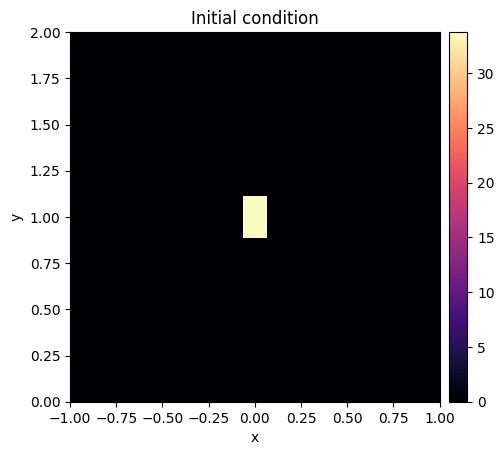

In [2]:
from examples.PyMPDATA_examples.comparison_against_pypde_2025.diffusion_2d import create_pde_state
from pde import DiffusionPDE

state= create_pde_state(initial_conditions=initial_conditions)
state.plot(title="Initial condition", cmap="magma")

In [ ]:
eq = DiffusionPDE(0.1)  # define the pde
result_pdepde = eq.solve(state, t_range=1, dt=0.001)
result_pdepde.plot(cmap="magma")
result_pdepde = result_pdepde.data

In [4]:
from examples.PyMPDATA_examples.comparison_against_pypde_2025.diffusion_2d import py_pde_solution

result_pdepde2 = py_pde_solution(initial_conditions=initial_conditions)
assert (result_pdepde == result_pdepde2).all()

  0%|          | 0/1.0 [00:00<?, ?it/s]

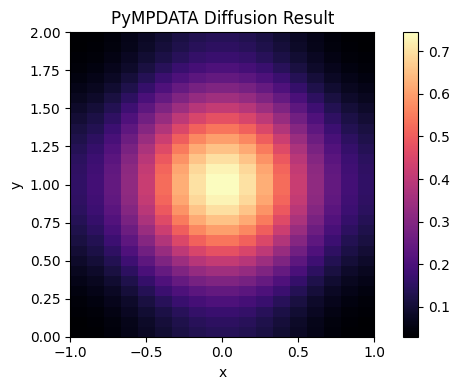

Total mass after diffusion: 1.000000 (should be close to 1)


In [7]:
import numpy as np
from matplotlib import pyplot as plt
from examples.PyMPDATA_examples.comparison_against_pypde_2025.diffusion_2d import (
    mpdata_solution,
)

result_mpdata = mpdata_solution(initial_conditions=initial_conditions)

# Plot final result
plt.figure(figsize=(6, 4))
plt.imshow(
    result_mpdata,
    cmap="magma",
    origin="lower",
    extent=[
        initial_conditions.min_x,
        initial_conditions.max_x,
        initial_conditions.min_y,
        initial_conditions.max_y,
    ],
)
plt.title("PyMPDATA Diffusion Result")
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar()
plt.tight_layout()
plt.show()

# Total mass check
mass = np.sum(result_mpdata) * initial_conditions.dx * initial_conditions.dy
print(f"Total mass after diffusion: {mass:.6f} (should be close to 1)")

In [8]:
diff = result_mpdata - result_pdepde
rmse = np.sqrt(np.mean(diff**2))
l1 = np.sum(np.abs(diff)) * initial_conditions.dx * initial_conditions.dy
mass_py_pde = result_pdepde.sum() * initial_conditions.dx * initial_conditions.dy
mass_mpdata = result_mpdata.sum() * initial_conditions.dx * initial_conditions.dy
print("Total mass:")
print(f"py-pde:{mass_py_pde:>12.6f}")
print(f"PyMPDATA:{mass_mpdata:>10.6f}")

print(f"RMSE: {rmse:.6f}, L1 Error: {l1:.6f}")

Total mass:
py-pde:    1.000000
PyMPDATA:  1.000000
RMSE: 0.014332, L1 Error: 0.045007


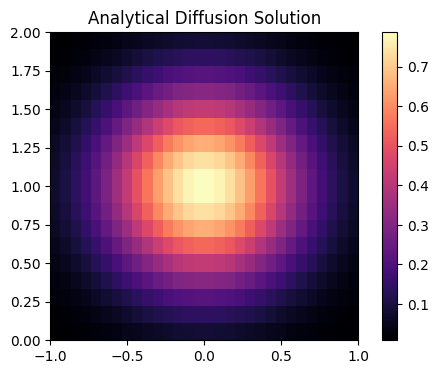

Comparison with Analytical Solution
Method                   RMSE           L1 Error
--------------------------------------------------
PDE                  0.018454           0.050680
MPDATA               0.028233           0.093632


In [11]:
def analytical_solution(x, y, t, D=0.1, center=(0.0, 1.0)):
    x0, y0 = center
    r2 = (x - x0) ** 2 + (y - y0) ** 2
    return (1 / (4 * np.pi * D * t)) * np.exp(-r2 / (4 * D * t))


x = np.linspace(initial_conditions.min_x + initial_conditions.dx / 2, initial_conditions.max_x - initial_conditions.dx / 2, initial_conditions.nx)
y = np.linspace(initial_conditions.min_y + initial_conditions.dy / 2, initial_conditions.max_y - initial_conditions.dy / 2, initial_conditions.ny)
X, Y = np.meshgrid(x, y, indexing="ij")
u_exact = analytical_solution(X, Y, initial_conditions.time_end, D=initial_conditions.diffusion_coefficient)

plt.figure(figsize=(6, 4))
plt.imshow(u_exact.T, origin="lower", extent=[
    initial_conditions.min_x,
    initial_conditions.max_x,
    initial_conditions.min_y,
    initial_conditions.max_y,
], cmap="magma")
plt.title("Analytical Diffusion Solution")
plt.colorbar()
plt.show()

diff_pde = result_pdepde - u_exact
rmse_pde = np.sqrt(np.mean((diff_pde) ** 2))
l1_error_pde = np.sum(np.abs(diff_pde)) * initial_conditions.dx * initial_conditions.dy

COL_WIDTH_METHOD = 10
COL_WIDTH_METRIC = 18

print("=" * 50)
print("Comparison with Analytical Solution")
print("=" * 50)
print(
    f"{'Method':<{COL_WIDTH_METHOD}} {'RMSE':>{COL_WIDTH_METRIC}} {'L1 Error':>{COL_WIDTH_METRIC}}"
)
print("-" * 50)
print(
    f"{'PDE':<{COL_WIDTH_METHOD}} {rmse_pde:>{COL_WIDTH_METRIC}.6f} {l1_error_pde:>{COL_WIDTH_METRIC}.6f}"
)

diff_mpdata = result_mpdata - u_exact
rmse_mpdata = np.sqrt(np.mean((diff_mpdata) ** 2))
l1_error_mpdata = np.sum(np.abs(diff_mpdata)) * initial_conditions.dx * initial_conditions.dy

print(
    f"{'MPDATA':<{COL_WIDTH_METHOD}} {rmse_mpdata:>{COL_WIDTH_METRIC}.6f} {l1_error_mpdata:>{COL_WIDTH_METRIC}.6f}"
)
print("=" * 50)